<a href="https://colab.research.google.com/github/jcv00036/amn_p/blob/main/Handout_3_Juan_Carrasco_Vico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>ANALYSIS AND NUMERICAL METHODS - HANDOUT 3</b></h1>
   

*   Name: Juan Carrasco Vico
*   At: EPSJ - University of Jaén
*   email: jcv00036@red.ujaen.es
*   Link to this file in GitHub: <a href= https://github.com/jcv00036/amn_p/tree/main>[link]</a> (visualization could be easier)

In [52]:
#Import all the libraries we can use:
import math
import numpy as np
import matplotlib.pyplot as plt

#**Implementation of mathematical methods**

## 1.Plot the sequence {xn} with 1 ≤ n ≤ 50 for:

In [53]:
def x(n,r): #my sequence
  if n==1: return 0.5
  return r*x(n-1,r)

#Extrems of my interval
a = 1
b = 4

### a)r=2.5

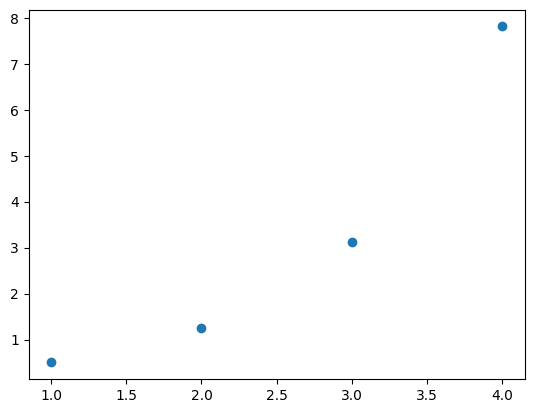

In [54]:
r = 2.5
y = [x(n,r) for n in range(a,b+1)]
nPlot = [n for n in range(a,b+1)]
fig, ax = plt.subplots()
ax.scatter(nPlot,y)

plt.show()

### b)r=3.5

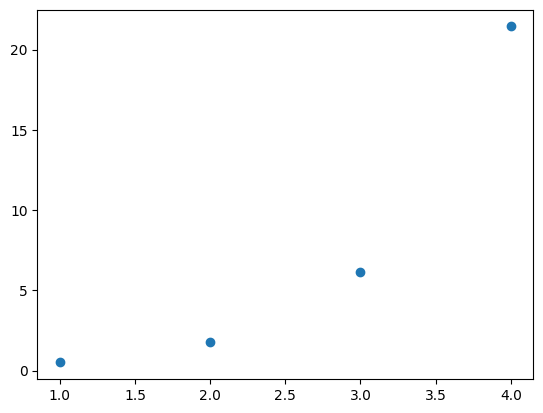

In [55]:
r = 3.5
y = [x(n,r) for n in range(a,b+1)]
nPlot = [n for n in range(a,b+1)]
fig, ax = plt.subplots()
ax.scatter(nPlot,y)

plt.show()

### c)r=3.55

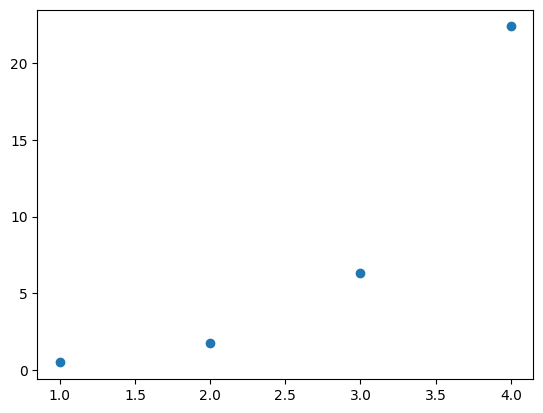

In [56]:
r = 3.55
y = [x(n,r) for n in range(a,b+1)]
nPlot = [n for n in range(a,b+1)]
fig, ax = plt.subplots()
ax.scatter(nPlot,y)

plt.show()

### d)r=1 + √8

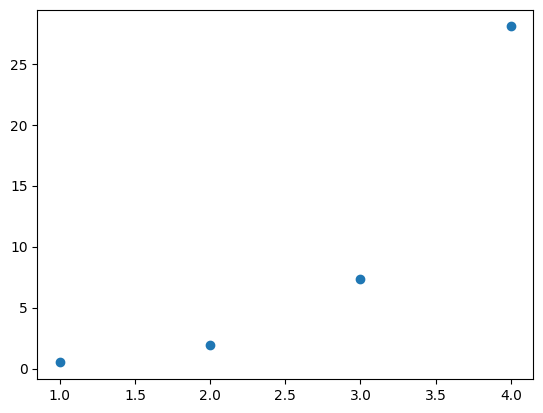

In [57]:
r = 1+ math.sqrt(8)
y = [x(n,r) for n in range(a,b+1)]
nPlot = [n for n in range(a,b+1)]
fig, ax = plt.subplots()
ax.scatter(nPlot,y)

plt.show()

## 2.Write a function remainderPol(P,Q) whose input are two polynomials P and Q that returns the remainder of the division of P and Q.


In [77]:
def multiplyPol(P,Q):
  """
  Parameters
    ----------
    P,Q: array
        Two arrays that represent two polynomials
    Returns
    -------
    product: array
        The product of P(x) and Q(x)
  """
  product = [0 for i in range(len(P)+len(Q)-1)]
  for i in range(0,len(P)):
    for j in range(0,len(Q)):
      product[i+j] += P[i]*Q[j]
  return product;

def remainderPol(P,Q):
  """
  Parameters
    ----------
    P,Q: array
        Two arrays that represent two polynomials
    Returns
    -------
    remainder: array
        The remainder of the division P(x)/Q(x)
  """
  if len(Q) == 0: #If Q is 0, the division cannot take place and so the remainder is NaN
    return "Nan"
  elif len(Q)>len(P): #If Q's degree is bigger than P's, the quotient is 0 and remainder is Q
    return Q
  else:
    #P(x)/Q(x) is calculated like so: Divide the leading terms, and multyply Q by the quotient, the substraction of P(x) and Q(x)*Quotient(x) = Remainder(x)
    #This goes on and on until Quotient(x)'s degree < Q(x)'s
    quotient = [0 for i in range(len(P)-len(Q)+1)]
    quotient[len(P)-len(Q)] = P[len(P)-1]//Q[len(Q)-1]
    remainder = [0 for i in range(len(P))];
    for i in range(len(P)):
      remainder[i] = P[i]-multiplyPol(Q,quotient)[i]
    del remainder[len(P)-1]
    while len(remainder) >= len(Q):
      remainder = remainderPol(remainder,Q)
  return remainder

def printPol(P):
  """Prints a polynomial

  Parameters
  ----------
    P: array
        Array that represent a polynomial
  """
  printed = False
  for i in range(len(P)-1,-1,-1):
    if(P[i]!=0):
      if(i!=len(P)-1 and printed):  print( "+ " ,end='')
      print(P[i], end='')
      printed = True
      if(i!=0 and i !=1):  print( "(x^"+str(i)+") " ,end='')
      if(i==1):  print( "x " ,end='')
  if not printed: print("0")

In [83]:
P = [1,-1,0,1] #meaning x^3 + 2x^3 + - x + 1
Q = [0,0,1] #meaning x^2

#This division has a quotient of x and a remainder of -x+1, son the output should be "-1x + 1"

remainder= remainderPol(P,Q)
if remainder == "Nan":
  print("Error: Q(x) musn't be 0")
else:
  print("Remainder:")
  printPol(remainder)

Remainder:
-1x + 1

##3. Write two functions exp(z) and log(z) (with input a complex number z) that return the complex exponential and the principal logarithm of z, respectively.


In [60]:
#We represent a complex number z as a list of the real part and imaginary part coefficients:
z = [1,1]

def complexProduct(z,w):
  """
  Parameters
  ----------
    z,w: array of length 2
        Arrays that represent a complex number

  Returns
  -------
    q: array of length 2
        Array that represents a complex number, the product of z and w
  """
  a , b = z
  c , d = w
  q = [(a*c - b*d),(a*d + b*c)]
  return q

def modulus(z):
  """
  Parameters
  ----------
    z: array of length 2
        Array that represents a complex number

  Returns
  -------
    modulus: float
        modulus of complex number z
  """
  a , b = z
  modulus = math.sqrt(a**2+b**2)
  return modulus

def arg(z):
  """
  Parameters
  ----------
    z: array of length 2
        Array that represents a complex number

  Returns
  -------
    arg: float
        argument of complex number z (in radians)
  """
  a , b = z
  if a>0:
    arg = np.arctan(b/a)
  elif a < 0 and b > 0:
    arg = np.arctan(b/a) - np.pi
  elif a<0 and b<0:
    arg = np.arctan(b/a) + np.pi
  elif a == 0 and b>0:
    arg = np.pi/2
  else:
    arg = -np.pi/2
  return arg

def exp(z):
  """
  Parameters
  ----------
    z: array of length 2
        Array that represents a complex number

  Returns
  -------
    exponential: array of length 2
        Array that represents a complex number, the exponential of z
  """
  exponential = complexProduct([np.e**z[0],0],[np.cos(z[1]),np.sin(z[1])])
  return exponential

def log(z):
  """
  Parameters
  ----------
    z: array of length 2
        Array that represents a complex number

  Returns
  -------
    logarithm: array of length 2
        Array that represents a complex number, the principal logarithm of z
  """
  logarithm = [np.log(modulus(z)),arg(z)]
  return logarithm

In [61]:
exponential = exp(z)
print("e^z = ", exponential[0]," + i*", exponential[1])

logarithm = log(z)
print("log(z) = ", logarithm[0]," + i*", logarithm[1])

e^z =  1.4686939399158851  + i* 2.2873552871788423
log(z) =  0.3465735902799727  + i* 0.7853981633974483


##4. Write two functions sine(x) and cosine(x) following the above steps and using recursivity. Show the absolute error in the comparison with the built-in functions math.sin(x) and math.cos(x) at integer values of x between −10 and 10.


In [84]:
def sine(x):
  """
  Parameters
  ----------
    x: float
        angle in radians

  Returns
  -------
    sin: float
        sine of x
  """
  #Reduce the x to the interval [0,2pi]
  if x < 0 :
    while(x < 0):
      x += 2*np.pi
    return sine(x)
  elif x > 2*np.pi:
    while(x > 2*np.pi):
      x -= 2*np.pi
    return sine(x)

  #Reduce the x to the interval [0,pi] if x is in [pi,2pi]
  if x > np.pi and x<= 2*np.pi:
    return -sine(x+np.pi)

  #Reduce x to [0,pi/2] if x is in [pi/2,pi]
  if x >= np.pi/2 and x<= np.pi:
    return sine(np.pi-x)

  #Reduce x to [0,pi/4] if x is in [pi/4,pi/2]
  if x >= np.pi/4 and x<= np.pi/2:
    return cosine(np.pi/2 - x)

  sin = x - (x**3)/6 + (x**5)/120 - (x**7)/5040
  return sin

def cosine(x):
  """
  Parameters
  ----------
    x: float
        angle in radians

  Returns
  -------
    cos: float
        cosine of x
  """
  #Reduce the x to the interval [0,2pi]
  if x < 0 :
    while(x < 0):
      x += 2*np.pi
    return cosine(x)
  elif x > 2*np.pi:
    while(x > 2*np.pi):
      x -= 2*np.pi
    return cosine(x)

  #Reduce the x to the interval [0,pi] if x is in [pi,2pi]
  if x > np.pi and x<= 2*np.pi:
    return -cosine(x+np.pi)

  #Reduce x to [0,pi/2] if x is in [pi/2,pi]
  if x >= np.pi/2 and x<= np.pi:
    return cosine(np.pi-x)

  #Reduce x to [0,pi/4] if x is in [pi/4,pi/2]
  if x >= np.pi/4 and x<= np.pi/2:
    return sine(np.pi/2 - x)

  cos = 1 - (x**2) +  (x**4)/24 - (x**6)/720
  return cos

def absoluteError(realValue, computedValue):
  """
  Parameters
  ----------
    realValue, computedValue: float
        values we want to compare

  Returns
  -------
    error: float
        difference between the real and the computed values
  """
  error = abs(realValue-computedValue)
  return error

In [85]:
#I check the error of my functions in comparison with numpy's for sines
#and cosines in a range of intergers [-10,10]

for i in range(-10,11):
  print("sin(",i,") = ",sine(i))
  print("Absolute error: ", absoluteError(np.sin(i),sine(i)))
  print("cos(",i,") = ",cosine(i))
  print("Absolute error: ", absoluteError(np.cos(i),cosine(i)))

sin( -10 ) =  0.5440210919462692
Absolute error:  1.8943100532631263e-08
cos( -10 ) =  0.6736310356797518
Absolute error:  1.5127025647562042
sin( -9 ) =  -0.41211848400300927
Absolute error:  1.238747326937073e-09
cos( -9 ) =  -0.820912077670541
Absolute error:  0.09021818421413597
sin( -8 ) =  -0.9786975650098764
Absolute error:  0.010660681613505418
cos( -8 ) =  -0.14550003380853066
Absolute error:  8.287814878826794e-14
sin( -7 ) =  -0.6569864616708982
Absolute error:  1.370478908135908e-07
cos( -7 ) =  -0.49698888349328474
Absolute error:  1.2508911378365895
sin( -6 ) =  0.27941549816667366
Absolute error:  3.225220090996572e-11
cos( -6 ) =  0.9200733265243225
Absolute error:  0.04009696012604347
sin( -5 ) =  0.9175642242008815
Absolute error:  0.04136005046225699
cos( -5 ) =  0.2836621854261447
Absolute error:  3.708156004478269e-11
sin( -4 ) =  0.5030518296689871
Absolute error:  0.2537506656389411
cos( -4 ) =  0.6536434912382652
Absolute error:  1.3072871121018772
sin( -3 ) =  

#**Root-finding methods**

##5.Plot the equation (x + 1)^3*e^x = 3 arctan(x) + 2 to show that it has one real solution in [−1, −0.5] and another real solution in [0, 0.5].

In [64]:
def f(x):
  return ((x+1)**3)*(np.e**x)-3*np.arctan(x)-2

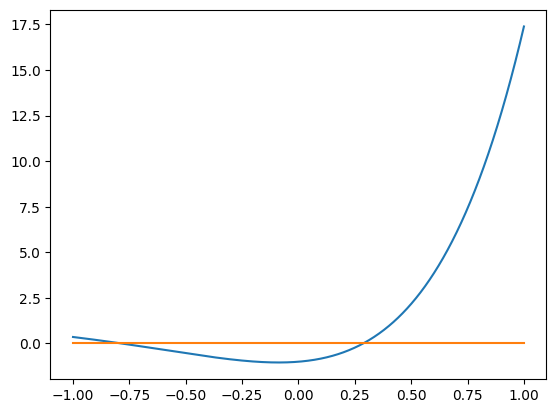

In [65]:
#Plot the funtions to see how there are two solutions to the equation
a = -1
b = 1
subdivisions = 1000

x = np.linspace(a,b,subdivisions)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot([a,b],[0,0])

plt.show()

###a. Bisection on [-1,-0.5] and [0,0.5]

In [66]:
def bisection(f,a,b,error):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    error: float
        maximum tolerable error

  Returns
  -------
    solution: float
        approximate solution to the equation
  """
  if(b-a<2*error):
    return (a+b)/2
  if(f((a+b)/2)*f(a)<0): #minus times minus returns minus, so if the result of the product is negative, it means that the solution is between c and a
    return bisection(f,a,(a+b)/2,error)
  else:
    return bisection(f,(a+b)/2,b,error)
  return (a+b)/2

x1 =  -0.7843764200806618
x2 =  0.2867117151618004


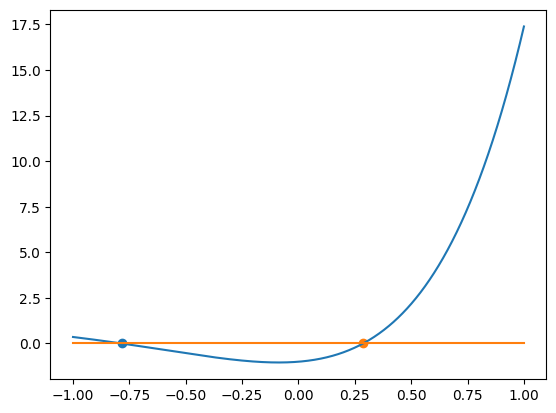

In [67]:
#in [-1,-0.5]
solution1 = bisection(f,-1,-0.5,10**-8)
print("x1 = ", solution1)

#in [0,0.5]
solution2 = bisection(f,0,0.5,10**-8)
print("x2 = ", solution2)

#plot the approximations
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot([a,b],[0,0])
ax.scatter(solution1,f(solution1))
ax.scatter(solution2,f(solution2))

plt.show()

###b. Regula falsi on [-1,-0.5] and [0,0.5]

In [68]:
def regulaFalsi(f,a,b,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    solution: float
        approximate solution to the equation
  """
  c = (a*f(b)-b*f(a))/(f(b)-f(a))
  if b-c<tolerance or c-a<tolerance:
    return c
  if f(a)*f(c)>0:
    return regulaFalsi(f,c,b,tolerance)
  else:
    return regulaFalsi(f,a,c,tolerance)

x1 =  -0.7843779749984261
x2 =  0.28668093312404447


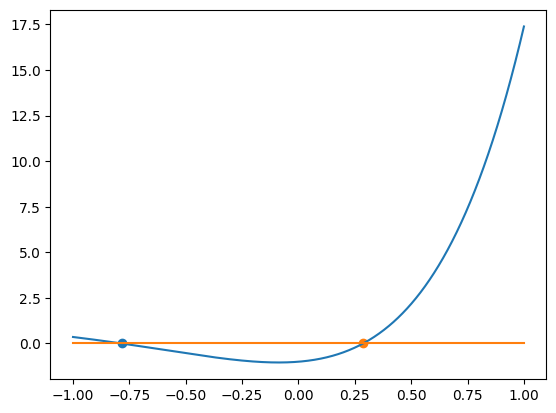

In [69]:
#in [-1,-0.5]
solution1 = regulaFalsi(f,-1,-0.5,10**-4)
print("x1 = ", solution1)

#in [0,0.5]
solution2 = regulaFalsi(f,0,0.5,10**-4)
print("x2 = ", solution2)

#plot the approximations
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot([a,b],[0,0])
ax.scatter(solution1,f(solution1))
ax.scatter(solution2,f(solution2))

plt.show()

###c. Newton-Ralphson with initial guesses x1 = -0.75 and x1 = 0.25

In [70]:
def derivative(f,x):
  h = 0.001
  return (f(x+h)-f(x))/h

In [71]:
def newtonRalphson(f,x,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    x: float
        approximate solution to the equation
  """
  while True:
    xnew = x - f(x)/derivative(f,x)
    if(math.fabs(x - xnew) < tolerance):
      x = xnew
      break
    x = xnew
  return x

x1 =  -0.7843764177451137
x2 =  0.2867117135633367


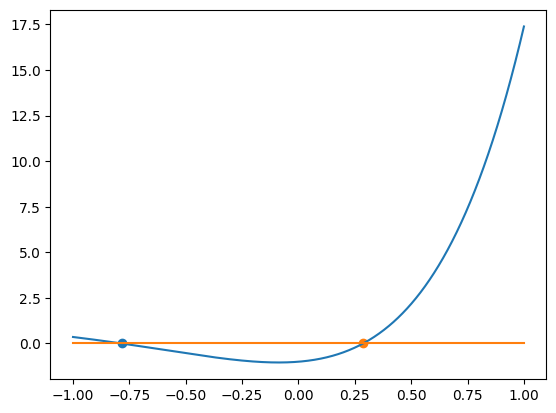

In [72]:
#For an initial guess x1=-0.75
solution1 = newtonRalphson(f,-0.75,10**-4)
print("x1 = ", solution1)

#For an initial guess x1=0.25
solution2 = newtonRalphson(f,25,10**-4)
print("x2 = ", solution2)

#plot the approximations
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot([a,b],[0,0])
ax.scatter(solution1,f(solution1))
ax.scatter(solution2,f(solution2))

plt.show()

###d. Transforming the equation into fixed-point equations

In [73]:
#g(x) is f(x) isolating x:
#f(x) = (x+1)^3*e^x-3arctan(x)-2;
#(x+1)^3 = x^3 + 3x^2 + 3x + 1
#g(x)=(((3arctan(x)+2)/e^x)-x^3 - 3x^2 -1)/3
#x = g(x)
def g1(x):
  return (((3*np.arctan(x)+2)/(np.e**x))-x**3 - 3*x**2 -1)/3
def g2(x):
  return (((3*np.arctan(x)+2)/(np.e**x))-x**3 - 3*x**2 -1)/3

In [74]:
def iteration(f,x,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    x: float
        approximate solution to the equation
  """
  xnew = f(x)
  while(abs(x-xnew)>tolerance):
    x = xnew
    xnew = f(x)
  return xnew

x1 =  0.2866833900021706
x2 =  0.2867513577569179


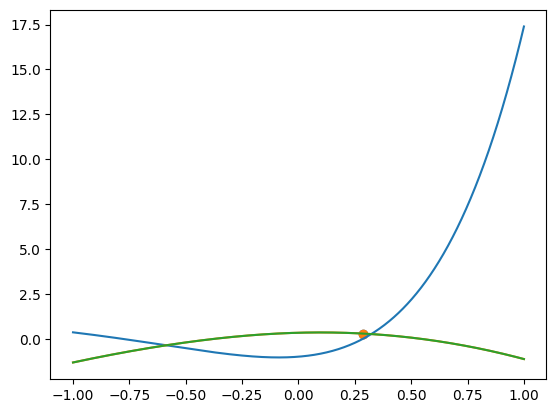

In [76]:
#For an initial guess x1=-1
solution1 = iteration(g1,-0.784,10**-4)
print("x1 = ", solution1)

#For an initial guess x1=0.25
solution2 = iteration(g2,0.25,10**-4)
print("x2 = ", solution2)

#plot the approximations
fig, ax = plt.subplots()


a = -1
b = 1
subdivisions = 1000

x = np.linspace(a,b,subdivisions)
g1y = g1(x)
g2y = g2(x)

ax.plot(x,y)
ax.plot(x,g1y)
ax.plot(x,g2y)
ax.scatter(solution1,g1(solution1))
ax.scatter(solution2,g2(solution2))

plt.show()

##6. A cannon is located in space at the origin (0,0,0) and throws a ball that follow a parabolic trajectory (t,2t,5t-t^2), where t represents time in secondss (the ball is thrown at time t = 0). If the land is modeled by the surface z = 5 sin(x/5) sin(y/6),give the approximate point where the cannonball hits the land again.

In [ ]:
def cannonBallPos(t):
  return [t,2*t,5*t-t**2]

def terrain(x,y):
  return 5*np.sin(x/5)*np.sin(y/6)

##7. We want to write a function that computes all real roots of a cubic equation p(x) = ax3 + bx2 + cx + d = 0 with a ̸= 0

##8. Plot the function f(x)=(x*log(x))/(x^2+1) to check that it has an absolute minimum and an absolute maximum. Find them in two ways:

In [ ]:
def f(x):
  return (x*np.log(x))/(x**2+1)

In [ ]:
#Plot the funtion
a = 0.1
b = 10
subdivisions = 10000

x = np.linspace(a,b,subdivisions)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x,y)

plt.show()

###a.  By means of the trisection method within an error of 10^−7

In [ ]:
def trisectionMinimum(f,a,b,error):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    error: float
        maximum tolerable error

  Returns
  -------
    x: float
        approximate possition of the minimum
  """
  if(b-a)<2*error:
    return(a+b)/2 #Return the midpoint

  c1=(2*a+b)/3
  c2=(a+2*b)/3

  if f(c1) < f(c2):
    return trisectionMinimum(f,a,c2,error)
  else:
    return trisectionMinimum(f,c1,b,error)

def trisectionMaximum(f,a,b,error):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    error: float
        maximum tolerable error

  Returns
  -------
    x: float
        approximate position of the maximum
  """
  if(b-a)<2*error:
    return(a+b)/2 #Return the midpoint

  c1=(2*a+b)/3
  c2=(a+2*b)/3

  if f(c1) > f(c2):
    return trisectionMaximum(f,a,c2,error)
  else:
    return trisectionMaximum(f,c1,b,error)

In [ ]:
error = 10**-7
print("The absolte minimum is in x=", trisectionMinimum(f,0.01,0.5,error))
print("The absolte maximum is in x=", trisectionMaximum(f,0.5,5,error))

###b. By gradient descent for suitable values of the parameter and the initial point

In [ ]:
def derivative(f,x):
  h=0.001
  return (f(x+h)-f(x))/h

In [ ]:
def gradientDescentMinimum(f,x,a,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    a: float
        parameter
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    xnew: float
        approximate possition of the minimum
  """
  while True:
    xnew = x-a*derivative(f,x)
    if(abs(x-xnew) < tolerance):
      x=xnew
      break
    x=xnew
  return xnew

def gradientDescentMaximum(f,x,a,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    a: float
        parameter
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    xnew: float
        approximate possition of the maximum
  """
  while True:
    xnew = x+a*derivative(f,x)
    if(abs(x-xnew) < tolerance):
      x=xnew
      break
    x=xnew
  return xnew

In [ ]:
a = 0.025
tolerance = 10**-7

print("The absolte minimum is in x=", gradientDescentMinimum(f,0.05,a,tolerance))
print("The absolte maximum is in x=", gradientDescentMaximum(f,2,a,tolerance))

##9.The function f(x, y) = x^3 + y^3 − 3xy + 3x − 3y has a local minimum. Find a better approximation to the exact value by the gradient descent method starting at the close point (0.4, 1.2) with an appropriate parameter. Stop when two consecutive approximations are at distance less than 10^−5

In [ ]:
def f(x,y):
  return x**3 + y**3 - 3*x*y + 3*x - 3*y

def gradient(f,x,y):
  h=0.001
  px=(f(x+h,y)-f(x,y))/h
  py=(f(x,y+h)-f(x,y))/h
  return [px,py]

In [ ]:
def gradientDescentMinimum2Variable(f,x,y,a,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess x
    y: float
        initial guess y
    a: float
        parameter
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    p: array
        approximate possition of the minimum
  """
  while True:
    xnew = x-a*gradient(f,x,y)[0]
    ynew = y-a*gradient(f,x,y)[1]
    if (((x-xnew)**2+(y-ynew)**2)**(1/2)<tolerance):
      x = xnew
      y = ynew
      break
    x = xnew
    y = ynew
  return [x,y]

In [ ]:
point = [0.4,1.2]
a = 0.2
tolerance = 10**-5

print("The approximate possition of the minimum is: ", gradientDescentMinimum2Variable(f,point[0],point[1],a,tolerance))